# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics_new import *

Using TensorFlow backend.


In [2]:
DATA_PATH = Path('../data/')

## Options

In [3]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)

In [4]:
n_models = 10
patience = 2
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [5]:
with open(DATA_PATH/'input_pipe.pkl', 'rb') as fin:
    input_pipe = pickle.load(fin)

In [6]:
train_fy = RotationReflectionFold(train_feats, h5py.File(DATA_PATH/'train.hdf5', "r+"),
                                  input_pipe=input_pipe, rot_mult=16)

## Determine LR

2 classes found, running in binary mode



/Users/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 11.767s 


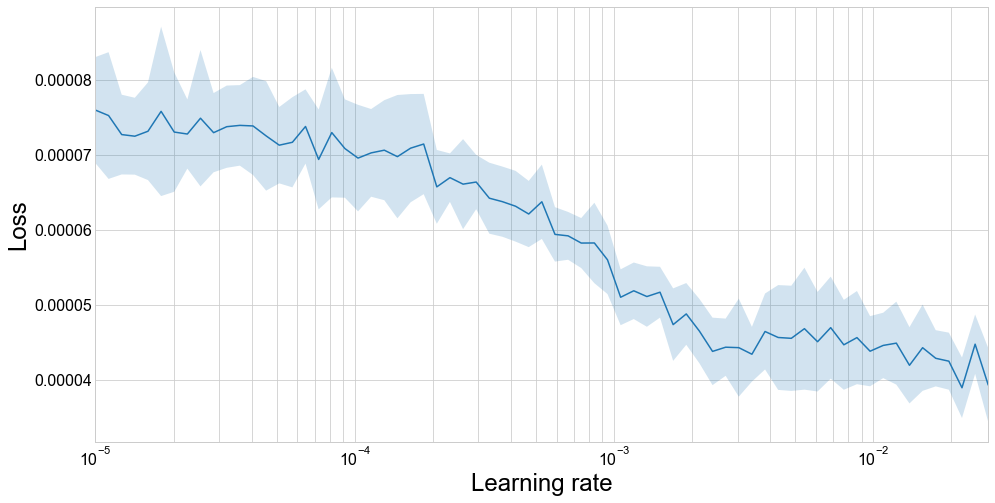

______________________________________



In [7]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [8]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'CosAnnealLR':{'cycle_mult':2, 'reverse':False, 'redux_decay':True}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using cosine LR annealing
2 classes found, running in binary mode

1 New best found: 3.9945552775850726e-05
2 New best found: 3.759493786762191e-05
3 New best found: 3.6358946592761294e-05
4 New best found: 3.6137850982202406e-05
5 New best found: 3.519255083532946e-05
6 New best found: 3.487053512775855e-05
7 New best found: 3.47734628210087e-05
10 New best found: 3.475031515825255e-05
11 New best found: 3.440536184786695e-05
12 New best found: 3.406738192200242e-05
13 New best found: 3.3709476882622704e-05
14 New best found: 3.3607009291767603e-05
15 New best found: 3.356724703455379e-05
21 New best found: 3.340279062016121e-05
23 New best found: 3.326808951929981e-05
24 New best found: 3.324387854113449e-05
25 New best found: 3.3000235570704236e-05
26 New best found: 3.289056339130606e-05
27 New best found: 3.2817157804247304e-05
29 New best found: 3.279699229271418e-05
30 New best found: 3.2744136909753876e-05
31 New best found: 3.274305

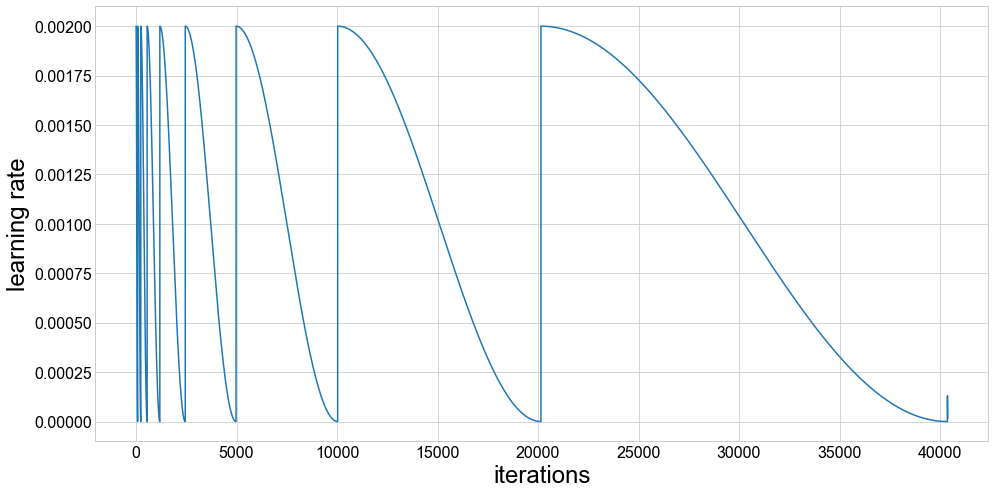

Fold took 287.615s

Training model 2 / 10
Using cosine LR annealing
1 New best found: 3.967744957481045e-05
2 New best found: 3.765246462280629e-05
3 New best found: 3.6747668217867614e-05
4 New best found: 3.632971935439855e-05
5 New best found: 3.5859579959651453e-05
6 New best found: 3.529574916028651e-05
7 New best found: 3.509584188286681e-05
10 New best found: 3.4671917418017985e-05
12 New best found: 3.433915119967423e-05
13 New best found: 3.417055627360242e-05
14 New best found: 3.3963260178279596e-05
21 New best found: 3.381740122131305e-05
23 New best found: 3.370384237205144e-05
24 New best found: 3.367061882017879e-05
25 New best found: 3.357487512548687e-05
26 New best found: 3.343400758021744e-05
28 New best found: 3.319693675002782e-05
29 New best found: 3.31696399836801e-05
30 New best found: 3.316732113162288e-05
48 New best found: 3.312802422879031e-05
50 New best found: 3.303312806237955e-05
52 New best found: 3.285001540207304e-05
53 New best found: 3.2778857913217

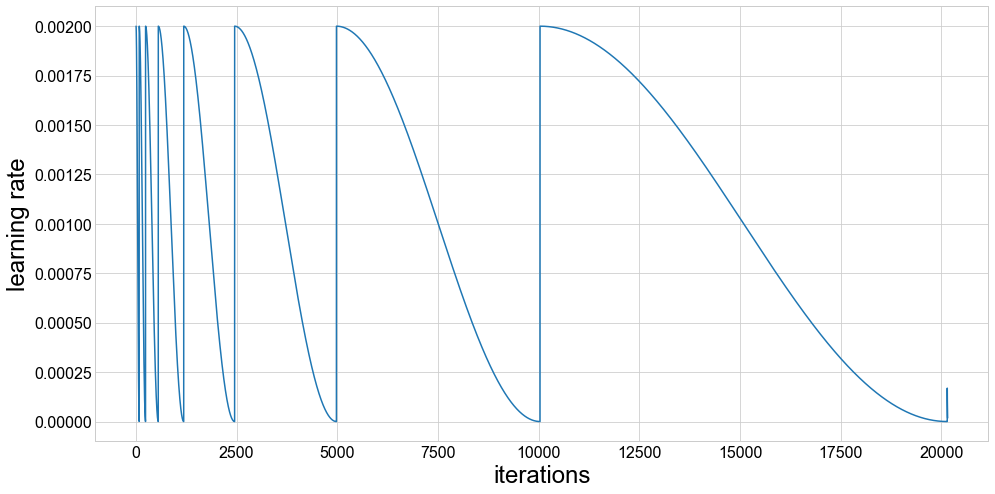

Fold took 150.381s

Training model 3 / 10
Using cosine LR annealing
1 New best found: 4.000574044141362e-05
2 New best found: 3.6850709737349323e-05
3 New best found: 3.6213915178947145e-05
5 New best found: 3.533967069265153e-05
6 New best found: 3.5022835998507594e-05
7 New best found: 3.483343976004157e-05
12 New best found: 3.415244465517945e-05
14 New best found: 3.4006031870145275e-05
15 New best found: 3.3961268046221635e-05
24 New best found: 3.368816753686643e-05
25 New best found: 3.360478836695241e-05
26 New best found: 3.341845083945576e-05
30 New best found: 3.3343891625793484e-05
45 New best found: 3.329395874192658e-05
48 New best found: 3.3262996473407174e-05
51 New best found: 3.3241257770734326e-05
52 New best found: 3.306411859280252e-05
53 New best found: 3.306115306112789e-05
55 New best found: 3.3048866170866415e-05
56 New best found: 3.3003127849414184e-05
57 New best found: 3.2997740758385515e-05
59 New best found: 3.2942075542207395e-05
60 New best found: 3.292

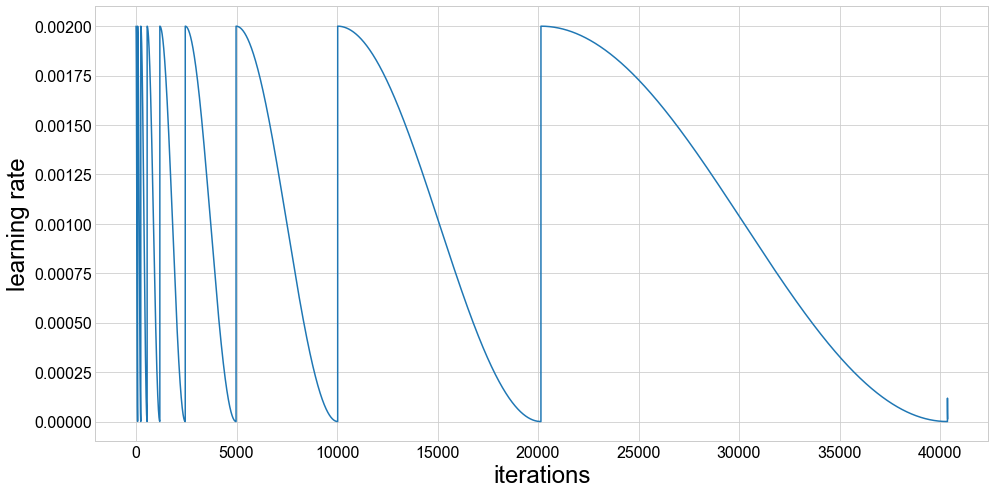

Fold took 298.846s

Training model 4 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100293). Check your callbacks.
  % delta_t_median)


1 New best found: 3.9258531508317775e-05
2 New best found: 3.6684405799781646e-05
3 New best found: 3.551217364916489e-05
5 New best found: 3.4522590202830137e-05
6 New best found: 3.428249529742021e-05
7 New best found: 3.4068599727241135e-05
11 New best found: 3.384766776554073e-05
12 New best found: 3.343590173495874e-05
14 New best found: 3.329165159211546e-05
15 New best found: 3.326067967095487e-05
23 New best found: 3.3110499507565234e-05
24 New best found: 3.3100673438305756e-05
25 New best found: 3.2954637696851166e-05
26 New best found: 3.289466215462513e-05
27 New best found: 3.271137481556387e-05
28 New best found: 3.265843511321e-05
41 New best found: 3.264273007945191e-05
46 New best found: 3.263711589022849e-05
48 New best found: 3.239676603239082e-05
51 New best found: 3.236264908332611e-05
53 New best found: 3.2357878533289406e-05
54 New best found: 3.2153327752838055e-05
57 New best found: 3.2113725331082023e-05
58 New best found: 3.211011481884668e-05
59 New best fou

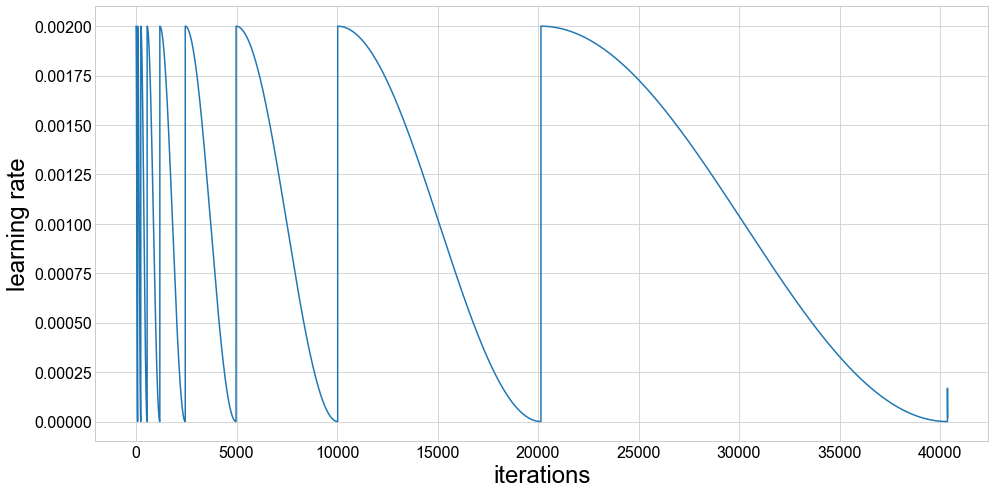

Fold took 307.976s

Training model 5 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124714). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8571762600871964e-05
2 New best found: 3.671685503127457e-05
3 New best found: 3.589245930663115e-05
4 New best found: 3.541550728714655e-05
5 New best found: 3.467032018744179e-05
6 New best found: 3.4405485385070285e-05
7 New best found: 3.420402287560448e-05
11 New best found: 3.357960334225622e-05
12 New best found: 3.348592398364357e-05
13 New best found: 3.329505905224211e-05
14 New best found: 3.320018653553871e-05
15 New best found: 3.319019017362844e-05
21 New best found: 3.318709197026298e-05
22 New best found: 3.3041454222489676e-05
23 New best found: 3.292474586673607e-05
25 New best found: 3.273046322041834e-05
26 New best found: 3.263841626531739e-05
27 New best found: 3.259468266808641e-05
28 New best found: 3.251422301874651e-05
29 New best found: 3.2498953233015084e-05
30 New best found: 3.247220793883609e-05
31 New best found: 3.246760419835219e-05
46 New best found: 3.240198641437135e-05
47 New best found: 3.238553813588406e-05
49 New best found: 

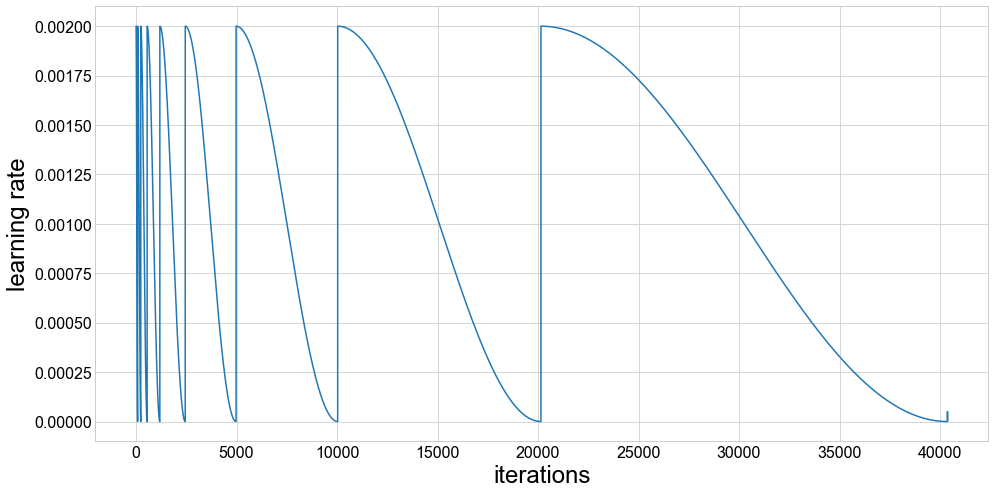

Fold took 314.943s

Training model 6 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116312). Check your callbacks.
  % delta_t_median)


1 New best found: 3.938800883305672e-05
2 New best found: 3.6628002531583174e-05
3 New best found: 3.5923072825004214e-05
5 New best found: 3.498244344459816e-05
6 New best found: 3.468952109986111e-05
7 New best found: 3.4588481071773436e-05
10 New best found: 3.437881322222952e-05
11 New best found: 3.424536445977897e-05
12 New best found: 3.36481923819507e-05
13 New best found: 3.363464505859665e-05
14 New best found: 3.3492506574274475e-05
15 New best found: 3.3486549816114035e-05
24 New best found: 3.325827162720435e-05
26 New best found: 3.2965861001639905e-05
27 New best found: 3.287384411469912e-05
28 New best found: 3.2853838932763955e-05
29 New best found: 3.2829288906810476e-05
30 New best found: 3.27681841184149e-05
46 New best found: 3.266585583054089e-05
48 New best found: 3.2588516213058566e-05
50 New best found: 3.24522346922144e-05
54 New best found: 3.226298182957324e-05
57 New best found: 3.2249385045777376e-05
59 New best found: 3.220860714506805e-05
92 New best fou

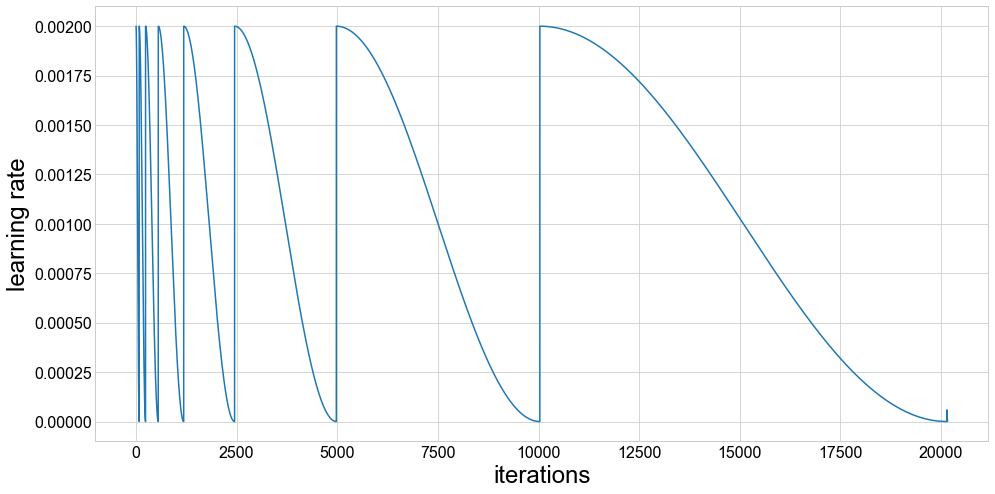

Fold took 165.473s

Training model 7 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.237590). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119096). Check your callbacks.
  % delta_t_median)


1 New best found: 3.860923002018111e-05
2 New best found: 3.692049392358841e-05
3 New best found: 3.581760839446855e-05
4 New best found: 3.563004498850037e-05
5 New best found: 3.470475647042251e-05
6 New best found: 3.452404190345581e-05
7 New best found: 3.4351617762111455e-05
10 New best found: 3.421132647578187e-05
11 New best found: 3.383999367390644e-05
12 New best found: 3.3735155794423045e-05
13 New best found: 3.3437826159873584e-05
14 New best found: 3.3323722965764396e-05
15 New best found: 3.328569488733443e-05
19 New best found: 3.321481749217342e-05
23 New best found: 3.28511982369695e-05
24 New best found: 3.277153671122842e-05
27 New best found: 3.2493498545021674e-05
28 New best found: 3.239074050015061e-05
47 New best found: 3.231489929492114e-05
48 New best found: 3.2266508329716826e-05
50 New best found: 3.2201226248011535e-05
51 New best found: 3.218368665173777e-05
53 New best found: 3.214683117870105e-05
54 New best found: 3.201238043241202e-05
56 New best found

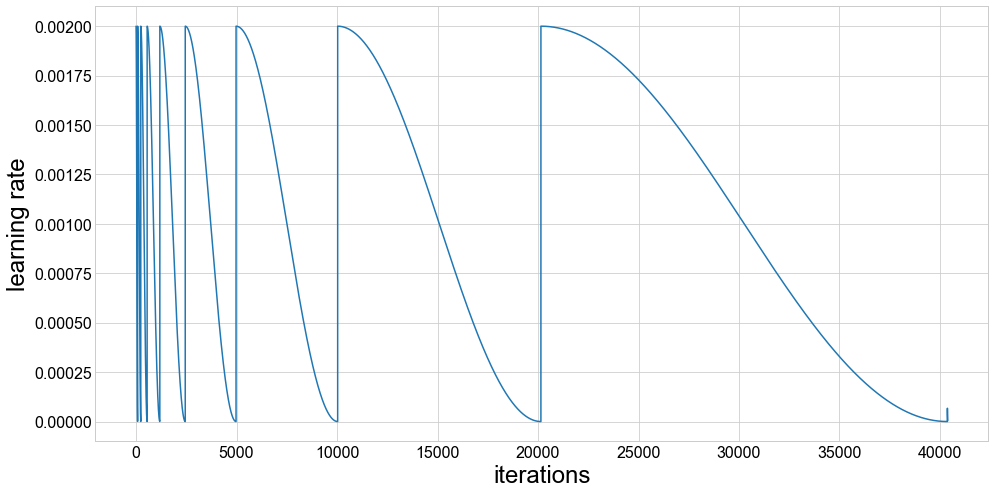

Fold took 315.658s

Training model 8 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.265142). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132965). Check your callbacks.
  % delta_t_median)


1 New best found: 4.1128588868014047e-05
2 New best found: 3.7666511131101286e-05
3 New best found: 3.716632705181837e-05
4 New best found: 3.6943072246504015e-05
5 New best found: 3.569241429795511e-05
6 New best found: 3.5544550129270646e-05
7 New best found: 3.5239845774776765e-05
9 New best found: 3.5235726069367956e-05
10 New best found: 3.5057883613626475e-05
11 New best found: 3.489933218224905e-05
12 New best found: 3.4439917525742205e-05
13 New best found: 3.425172216375358e-05
14 New best found: 3.4127060299215376e-05
15 New best found: 3.410097182277241e-05
23 New best found: 3.396601284548524e-05
24 New best found: 3.392957007599762e-05
25 New best found: 3.3915776288631606e-05
26 New best found: 3.3699415570299605e-05
27 New best found: 3.358171226791455e-05
28 New best found: 3.345095143595245e-05
29 New best found: 3.343582868910744e-05
31 New best found: 3.342415205770522e-05
44 New best found: 3.3368636653904105e-05
48 New best found: 3.336046997574158e-05
49 New best 

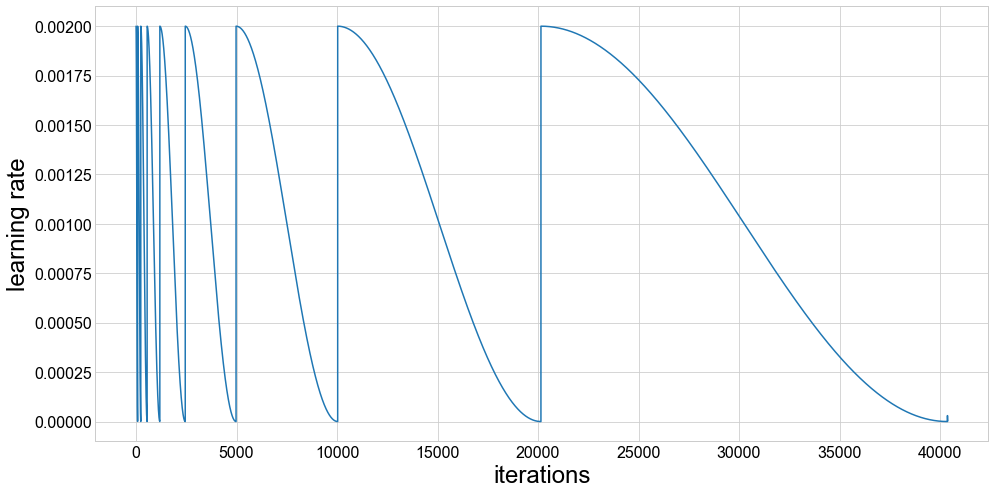

Fold took 325.378s

Training model 9 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.286242). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143419). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8535958545980975e-05
2 New best found: 3.594102089555236e-05
3 New best found: 3.515631494374247e-05
4 New best found: 3.4929659479530525e-05
5 New best found: 3.425850312341936e-05
6 New best found: 3.353565223951591e-05
7 New best found: 3.3425829649786466e-05
11 New best found: 3.326597440027399e-05
12 New best found: 3.2701141107827426e-05
13 New best found: 3.248706258455059e-05
14 New best found: 3.2435001224803276e-05
15 New best found: 3.2411785652220715e-05
22 New best found: 3.238777870283229e-05
24 New best found: 3.2137691605021246e-05
25 New best found: 3.1942538684234026e-05
26 New best found: 3.191852298114099e-05
28 New best found: 3.184337297279853e-05
29 New best found: 3.172681369251222e-05
46 New best found: 3.170568478963105e-05
48 New best found: 3.1534628846566196e-05
52 New best found: 3.138553195822169e-05
54 New best found: 3.134460570581723e-05
56 New best found: 3.12761819914158e-05
60 New best found: 3.127573184829089e-05
61 New best fou

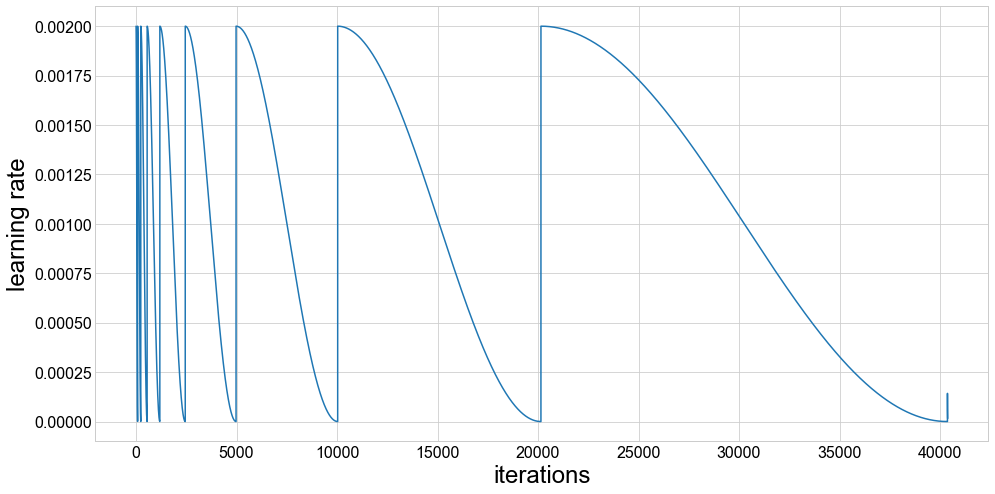

Fold took 334.337s

Training model 10 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.303629). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152334). Check your callbacks.
  % delta_t_median)


1 New best found: 3.9122220207354984e-05
2 New best found: 3.668660586117767e-05
3 New best found: 3.620194090472069e-05
4 New best found: 3.5709593650244644e-05
5 New best found: 3.4953013225458566e-05
7 New best found: 3.44983654023963e-05
10 New best found: 3.424424184777308e-05
11 New best found: 3.400931351643521e-05
13 New best found: 3.363661659095669e-05
14 New best found: 3.354144513432402e-05
21 New best found: 3.327629185805563e-05
24 New best found: 3.315854471584316e-05
26 New best found: 3.3062232365773524e-05
27 New best found: 3.289501671824837e-05
28 New best found: 3.2715368412027604e-05
30 New best found: 3.268369319412159e-05
31 New best found: 3.2682097019278445e-05
48 New best found: 3.259187341463985e-05
52 New best found: 3.257956523520988e-05
53 New best found: 3.24775271496037e-05
55 New best found: 3.225624437909573e-05
100 New best found: 3.2190718447964175e-05
109 New best found: 3.209609260520665e-05
110 New best found: 3.20770095102489e-05
118 New best fo

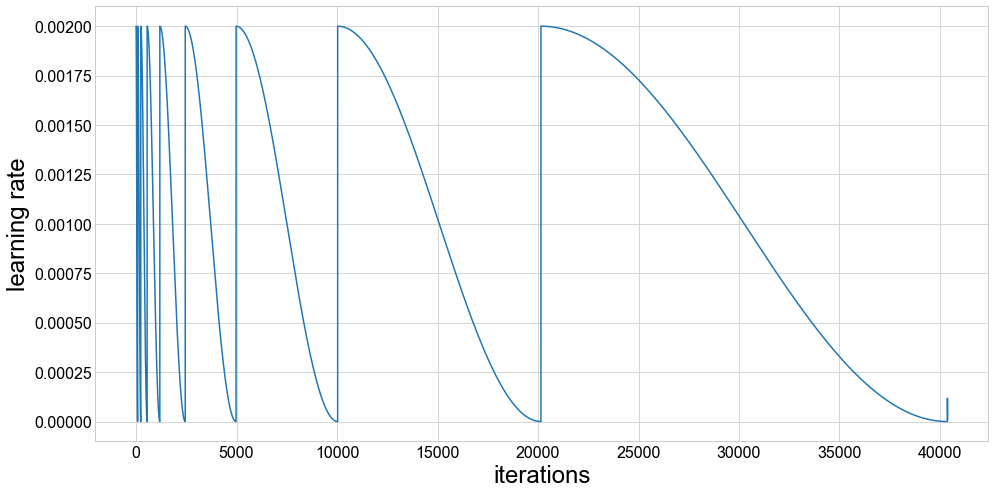

Fold took 347.957s


______________________________________
Training finished
Cross-validation took 2852.035s 


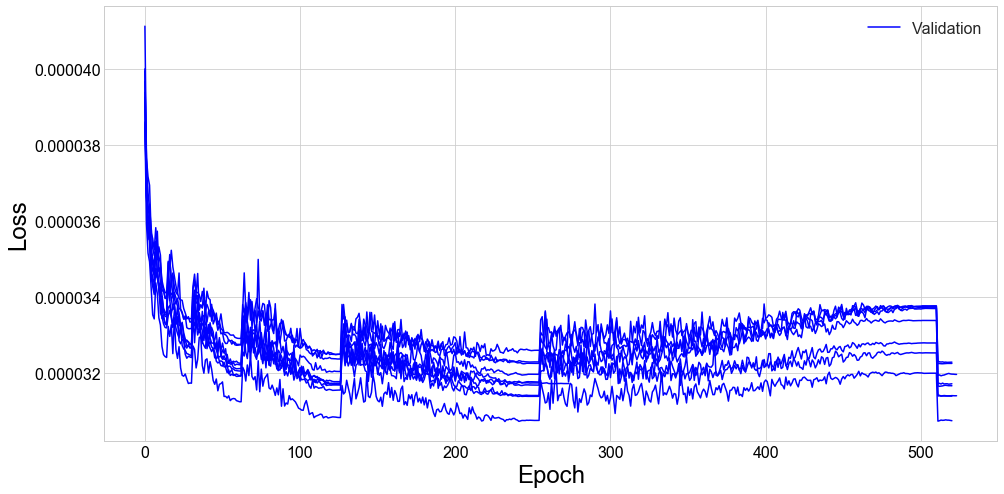

Mean loss = 3.17e-05 +- 2e-07
Mean wAUC = 0.0634 +- 0.0006
Mean AUC = 0.0984 +- 0.0005
Mean AMS = 3.98 +- 0.1
Mean cut = 0.967 +- 0.004
______________________________________



<Figure size 432x288 with 0 Axes>

In [9]:
results, histories = fold_train_model(train_fy, n_models,
                                      model_gen_params=model_gen_params,
                                      train_params=train_params, train_on_weights=True,
                                      use_callbacks=use_callbacks, ams_args=ams_args,
                                      max_epochs=max_epochs, patience=patience,
                                      verbose=1, plots=plots)

The impact of data augmentation is pretty clear. Comparing the training here to that of the the CRL Swish model without augmentation we can see that we effectively gain another LR cycles worth of training epochs before we start overfitting, which allows the networks to reach much lower looses (3.18e-5 c.f. 3.23e-5) and a higher AMSs (3.98 c.f. 3.71)

## Construct ensemble

In [ ]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [ ]:
from hepml_tools.general.ensemble_functions import assemble_ensemble

In [ ]:
ensemble, weights = assemble_ensemble(results, ensemble_size, ensemble_mode, compile_args)

## Response on validation data without TTA

In [ ]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [ ]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

In [ ]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source)),
                                                           roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source), sample_weight=get_feature('weights', val_fy.source))))

In [ ]:
ams_scan_slow(convert_to_df(val_fy.source), br=10, w_factor=250000/50000)

In [ ]:
%%time
bootstrap_mean_calc_ams(convert_to_df(val_fy.source), br=10, w_factor=250000/50000, N=512)

With test-time augmentation we improve on 4_Model_Swish_Cyclical-LR in all metrics on validation data: overall AMS 3.77->3.90, AMS corresponding to mean cut 3.72->3.89.

## Response on validation data with TTA

In [ ]:
val_fy = RotationReflectionFold(train_feats, h5py.File(DATA_PATH/'val.hdf5', "r+"), input_pipe=input_pipe,
                                  rotate = True, reflect = True, rot_mult=8)

In [ ]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

In [ ]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source)),
                                                           roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source), sample_weight=get_feature('weights', val_fy.source))))

In [ ]:
ams_scan_slow(convert_to_df(val_fy.source), br=10, w_factor=250000/50000)

In [ ]:
%%time
bootstrap_mean_calc_ams(convert_to_df(val_fy.source), br=10, w_factor=250000/50000, N=512)

Adding test-time augmentation provides further benefits: overall AMS 3.90->3.97, AMS corresponding to mean cut 3.89->3.91.

# Test scoring - Without TTA

In [ ]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [ ]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

In [ ]:
score_test_data(test_fy.source, 0.9610517785185948)

Using the cuts we optimised by bootstrapping the validation data, we end up with a private score which would have beaten the winning entry (3.817 c.f. 3.806). It would be nice if the public score were higher, though.

# Test scoring - With TTA

In [ ]:
test_fy = RotationReflectionFold(train_feats, h5py.File(DATA_PATH/'testing.hdf5', "r+"), input_pipe=input_pipe,
                                   rotate = True, reflect = True, rot_mult=8)

In [ ]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

In [ ]:
score_test_data(test_fy.source, 0.9613511364441365)

In [ ]:
score_test_data(test_fy.source, 0.9614)

Using the cuts we optimised by bootstrapping the validation data, we end up with a private score which would have beaten the winning entry (3.817 c.f. 3.806). It would be nice if the public score were higher, though.

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)